<a href="https://colab.research.google.com/github/fmezacr/circuits/blob/main/Desfases_i_v_en_CyL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

<div style="font-size:small;">

MIT License

Copyright (c) [2024] Felipe Meza-Obando

*Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software for educational purposes only. You must give author appropriate credit, provide a link to the license and source, and indicate if changes were made.*
</div>

---

In [12]:
!pip install schemdraw


# **Tutorial: Desfase entre Voltaje y Corriente en Bobinas y Capacitores**
### Autor: ***Felipe Meza-Obando***

Exploraremos los desfases que ocurren entre el voltaje y la corriente en dos tipos de circuitos:

1. **Circuito RL en Serie**: Analizaremos cómo la corriente atrasa al voltaje en una bobina (inductor).
2. **Circuito RC en Paralelo**: Veremos cómo la corriente adelanta al voltaje en un capacitor.


## 1. Circuito RL en Serie

### 1.1. Descripción del Circuito

Un circuito RL en serie consiste en una resistencia $R$ y una inductancia $L$ conectadas en serie con una fuente de voltaje alterno $V(t)$.

### 1.2. Análisis del Circuito

**Ley de Kirchhoff de Voltajes**:

$
V(t) = V_R(t) + V_L(t)
$

Donde:

- $V_R(t) = I(t) \cdot R$ es el voltaje en la resistencia
- $V_L(t) = L \dfrac{dI(t)}{dt}$ es el voltaje en el inductor

### 1.3. Relación entre Voltaje y Corriente

**Ecuación diferencial**:

$
V(t) = I(t) \cdot R + L \dfrac{dI(t)}{dt}
$

Para una fuente de voltaje sinusoidal:

$
V(t) = V_0 \cos(\omega t)
$

Buscamos una solución para $I(t)$ de la forma:

$
I(t) = I_0 \cos(\omega t - \phi)
$

### 1.4. Cálculo del Desfase

**Impedancia del circuito**:

$
Z = \sqrt{R^2 + (\omega L)^2}
$

**Ángulo de fase $( \phi $)**:

$
\phi = \arctan\left( \dfrac{\omega L}{R} \right)
$

### 1.5. Interpretación del Desfase

- **La corriente $I(t)$ atrasa al voltaje $V(t)$ en un ángulo $\phi$**.
- **En el inductor**, el voltaje $V_L(t)$ adelanta a la corriente $I(t)$ en $ 90^\circ $.

### 1.6. Resumen de Relaciones

- **Corriente**:

$
  I(t) = \dfrac{V_0}{Z} \cos(\omega t - \phi)
$

- **Voltaje en el inductor**:

$
  V_L(t) = L \dfrac{dI(t)}{dt} = \omega L \dfrac{V_0}{Z} \sin(\omega t - \phi)
$

  Esto implica que:

$
  V_L(t) = \omega L I_0 \sin(\omega t - \phi)
$

- **Desfase entre $ V_L(t) $ e $ I(t) $**:

  - $ V_L(t)$ adelanta a $ I(t) $ en $ 90^\circ $:

$
    V_L(t) = \omega L I_0 \cos\left( \omega t - \phi + 90^\circ \right)
$



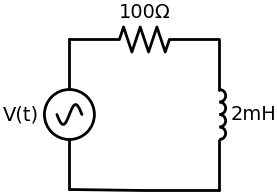

In [84]:
import schemdraw
import schemdraw.elements as elm

# Crear el circuito
with schemdraw.Drawing() as d:
    d += elm.Resistor().label('100Ω')  # Resistencia de 100KΩ etiquetada en la parte superior
    d += elm.Inductor().down().label('2mH', loc='bottom')  # Inductor de 200mH etiquetado en la parte inferior
    d += elm.Line().left()  # Línea hacia la izquierda desde el inductor
    d += elm.SourceSin().up().label('V(t)')  # Fuente de voltaje alterno (CA) etiquetada como V(t)
    d.draw()

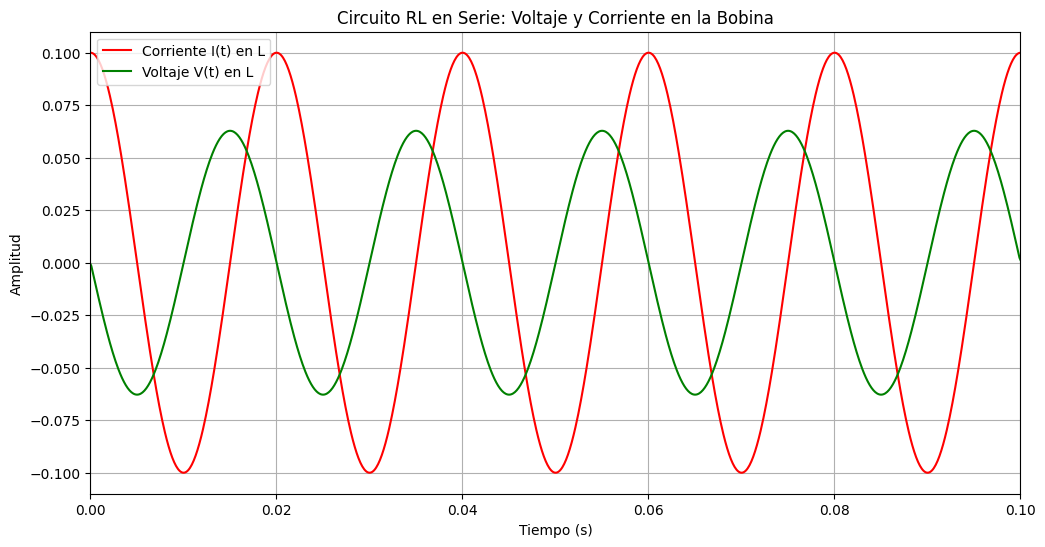

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del circuito
V0 = 10           # Voltaje máximo (V)
f = 50            # Frecuencia (Hz)
omega = 2 * np.pi * f  # Velocidad angular (rad/s)
R = 100           # Resistencia (ohmios)
L = 2e-3           # Inductancia (henrios)
t = np.linspace(0, 0.1, 1000)  # Vector de tiempo

# Impedancia y ángulo de fase
Z = np.sqrt(R**2 + (omega * L)**2)
phi = np.arctan(omega * L / R)

# Voltaje de fuente (no se graficará)
V_t = V0 * np.cos(omega * t)

# Corriente en el circuito
I_t = (V0 / Z) * np.cos(omega * t - phi)

# Voltaje en la bobina
V_L = L * np.gradient(I_t, t)

# Gráficas
plt.figure(figsize=(12, 6))
# Eliminamos la curva del voltaje de la fuente
# plt.plot(t, V_t, label='Voltaje de Fuente V(t)', linestyle='--', color='blue')
plt.plot(t, I_t, label='Corriente I(t) en L', color='red')
plt.plot(t, V_L, label='Voltaje V(t) en L', color='green')
plt.title('Circuito RL en Serie: Voltaje y Corriente en la Bobina')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.xlim(0, 0.1)
plt.legend()
plt.grid(True)
plt.show()



- Como se observa en la curva, en el **Inductor $(L)$**:

  - El voltaje en el inductor adelanta a la corriente en $ 90^\circ $.
  - **Desfase**: $V_L(t) $ adelanta a $ I(t) $.



## 2. Circuito RC en Paralelo

### 2.1. Descripción del Circuito

Un circuito RC en paralelo consiste en una resistencia \( R \) y una capacitancia \( C \) conectadas en paralelo a una fuente de voltaje alterno \( V(t) \).

### 2.2. Análisis del Circuito

**Corriente total**:

$
I(t) = I_R(t) + I_C(t)
$

Donde:

- $I_R(t) = \dfrac{V(t)}{R} $ (corriente a través de la resistencia)
- $I_C(t) = C \dfrac{dV(t)}{dt} $ (corriente a través del capacitor)

### 2.3. Relación entre Voltaje y Corriente

Para una fuente de voltaje sinusoidal:

$
V(t) = V_0 \cos(\omega t)
$

**Corriente en el capacitor**:

$
I_C(t) = -\omega C V_0 \sin(\omega t)
$

### 2.4. Cálculo del Desfase

- **La corriente $ I_C(t) $ adelanta al voltaje $ V(t) $ en $ 90^\circ $**.
- Esto se debe a que la derivada de $ \cos(\omega t) $ es $ -\omega \sin(\omega t) $.

### 2.5. Resumen de Relaciones

- **Voltaje en el capacitor**:

  $
  V_C(t) = V_0 \cos(\omega t)
  $

- **Corriente en el capacitor**:

  $
  I_C(t) = \omega C V_0 \cos\left( \omega t + 90^\circ \right)
  $

- **Desfase entre $ I_C(t) $ y $ V_C(t) $**:

  - $ I_C(t) $ adelanta a $ V_C(t) $ en $ 90^\circ $.

---





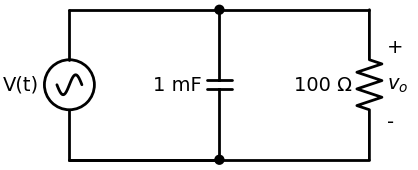

In [83]:
with schemdraw.Drawing() as d:
    V1 = d.add(elm.SourceSin().label('V(t)')) # Fuente de voltaje sinusoidal V(t)
    d.add(elm.Line().right()) # Línea hacia el nodo superior
    d.add(elm.Dot())  # Nodo superior
    # Dividir el nodo para los componentes en paralelo
    d.push()  # Guardar la posición del nodo superior
    # Resistencia conectada hacia la derecha desde el nodo
    d.add(elm.Line().right())  # Línea hacia la resistencia
    R1 = d.add(elm.Resistor().down().label('100 Ω').label(['+', '$v_o$', '-'], loc='bot'))
    # Línea de retorno desde la resistencia hacia la fuente
    d.add(elm.Line().left().to(V1.start))  # Línea de retorno
    # Volver al nodo superior para el capacitor
    d.pop()  # Volver al nodo superior para conectar el capacitor
    # Capacitor conectado en paralelo (desde el nodo superior hacia abajo)
    d.add(elm.Capacitor().down().label('1 mF'))
    # Nodo inferior
    d.add(elm.Dot())
    # Línea de retorno desde el nodo inferior hasta la fuente
    d.add(elm.Line().left().tox(V1.start))
    d.draw()

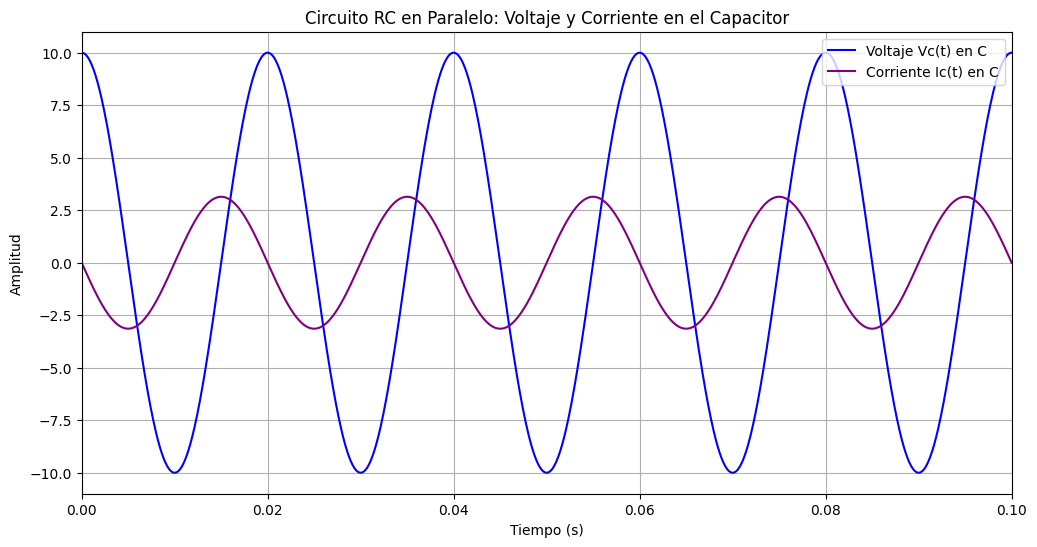

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del circuito
V0 = 10           # Voltaje máximo (V)
f = 50            # Frecuencia (Hz)
omega = 2 * np.pi * f  # Velocidad angular (rad/s)
R = 100           # Resistencia (ohmios)
C = 1e-3       # Capacitancia (faradios)
t = np.linspace(0, 0.1, 1000)  # Vector de tiempo

# Voltaje de fuente (no se graficará)
V_t = V0 * np.cos(omega * t)

# Corriente en el capacitor
I_C = -omega * C * V0 * np.sin(omega * t)

plt.figure(figsize=(12, 6))
plt.plot(t, V_C, label='Voltaje Vc(t) en C', color='blue')
plt.plot(t, I_C, label='Corriente Ic(t) en C', color='purple')
plt.title('Circuito RC en Paralelo: Voltaje y Corriente en el Capacitor')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.xlim(0, 0.1)
plt.legend()
plt.grid(True)
plt.show()




- Como se observa en la curva, en el **Capacitor $(C)$**:

  - La corriente en el capacitor adelanta al voltaje en $ 90^\circ $.
  - **Desfase**: $ I_C(t) $ adelanta a $ V_C(t) $.


## 3. Resumen de Desfases

| Elemento   | Relación Voltaje-Corriente                        | Desfase                       |
|------------|---------------------------------------------------|-------------------------------|
| **Inductor $( L $)**  | $ V_L(t) = L \dfrac{dI(t)}{dt} $               | $ V_L(t) $ adelanta a $ I(t) $ en $ 90^\circ $ |
| **Capacitor $(C)$** | $ I_C(t) = C \dfrac{dV_C(t)}{dt} $             | $ I_C(t) $ adelanta a $ V_C(t) $ en $ 90^\circ $ |


## 5. Resumen Final

- En **circuitos inductivos**, el voltaje adelanta a la corriente.
- En **circuitos capacitivos**, la corriente adelanta al voltaje.
- ELI the ICE man !!!!
